In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/binod ai/food_hygiene_rating_data.csv")

# Clean column names
df.columns = df.columns.str.strip()

print(df.columns)

Mounted at /content/drive
Index(['Unnamed: 0', 'FHRSID', 'LocalAuthorityBusinessID', 'BusinessName',
       'BusinessType', 'PostCode', 'RatingValue', 'RatingKey', 'RatingDate',
       'LocalAuthorityCode', 'LocalAuthorityName', 'Longitude', 'Latitude'],
      dtype='object')


### **Confusion Matrix for Each Model**

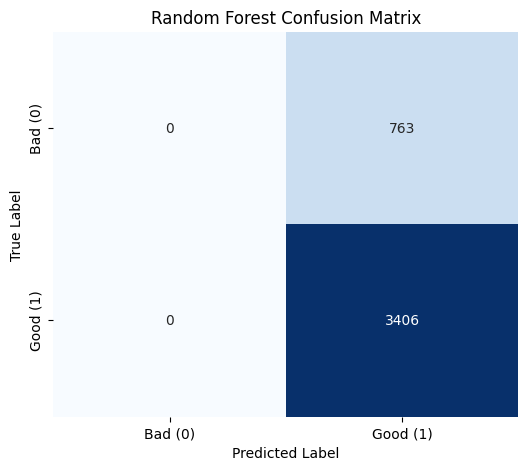

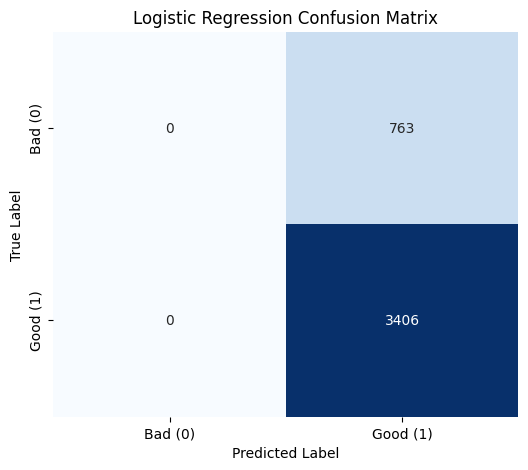

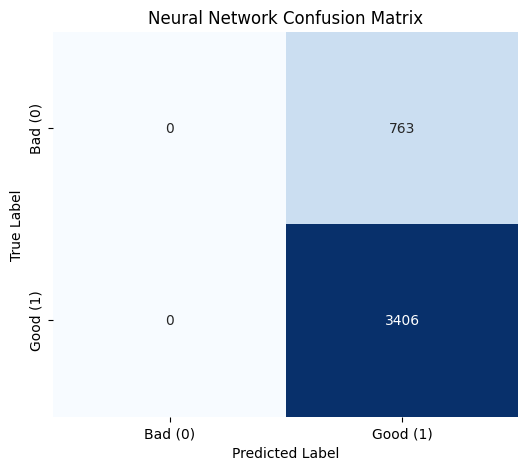

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bad (0)', 'Good (1)'], yticklabels=['Bad (0)', 'Good (1)'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, rf_final_pred, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_final_pred, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, mlp_final_pred, 'Neural Network Confusion Matrix')

### **ROC Curve for Each Model**

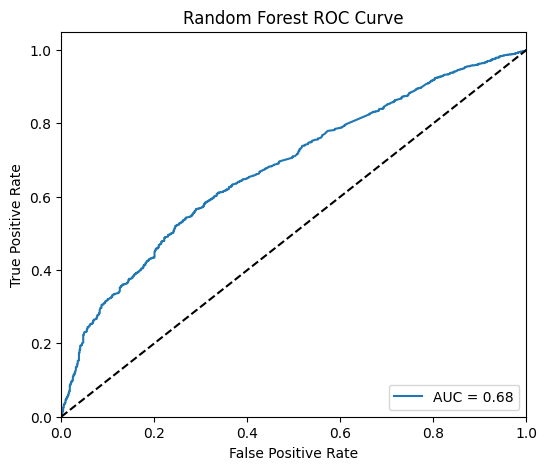

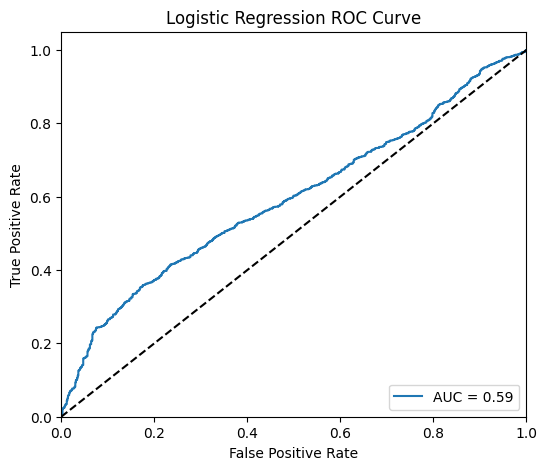

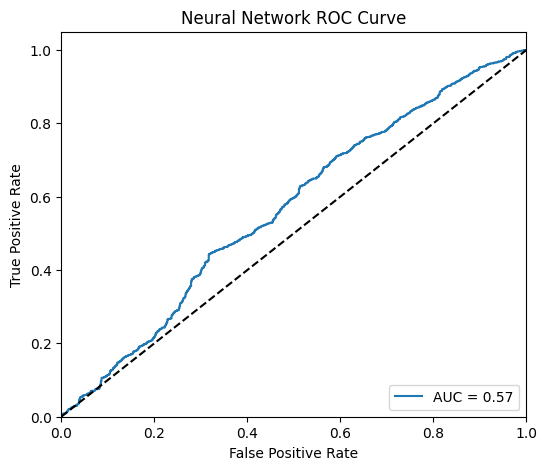

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get probabilities for ROC curve (assuming predict_proba is available for these models)
# Note: Some models might not have predict_proba or require specific handling.
# For Logistic Regression and Neural Networks, predict_proba returns probabilities for both classes.
# We need the probability of the positive class (1).

# Random Forest
rf_proba = best_rf.predict_proba(X_test_rfe)[:, 1]
plot_roc_curve(y_test, rf_proba, 'Random Forest ROC Curve')

# Logistic Regression
lr_proba = lr_final.predict_proba(X_test_rfe)[:, 1]
plot_roc_curve(y_test, lr_proba, 'Logistic Regression ROC Curve')

# Neural Network
mlp_proba = mlp_final.predict_proba(X_test_rfe)[:, 1]
plot_roc_curve(y_test, mlp_proba, 'Neural Network ROC Curve')

### **Detailed Performance Metrics Table**

In [36]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:\n", classification_report(y_test, rf_final_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_final_pred))
print("Neural Network Classification Report:\n", classification_report(y_test, mlp_final_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       763
           1       0.82      1.00      0.90      3406

    accuracy                           0.82      4169
   macro avg       0.41      0.50      0.45      4169
weighted avg       0.67      0.82      0.73      4169

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       763
           1       0.82      1.00      0.90      3406

    accuracy                           0.82      4169
   macro avg       0.41      0.50      0.45      4169
weighted avg       0.67      0.82      0.73      4169

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       763
           1       0.82      1.00      0.90      3406

    accuracy                           0.82      4169
   macr

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [6]:
leakage_cols = [
    'Unnamed: 0',
    'FHRSID',
    'LocalAuthorityBusinessID',
    'BusinessName',
    'RatingKey',
    'RatingDate'
]

df = df.drop(columns=leakage_cols, errors='ignore')


In [8]:
# Check rating column
if 'RatingValue' not in df.columns:
    raise ValueError("RatingValue column not found. Check dataset.")

# Convert RatingValue to numeric
df['RatingValue'] = pd.to_numeric(df['RatingValue'], errors='coerce')

# Drop missing ratings
df = df.dropna(subset=['RatingValue'])

# Create binary target
df['Target'] = (df['RatingValue'] >= 4).astype(int)

# Drop original rating column
df = df.drop('RatingValue', axis=1)

print(df['Target'].value_counts())


Target
1    17027
0     3815
Name: count, dtype: int64


In [14]:
df = df.dropna()


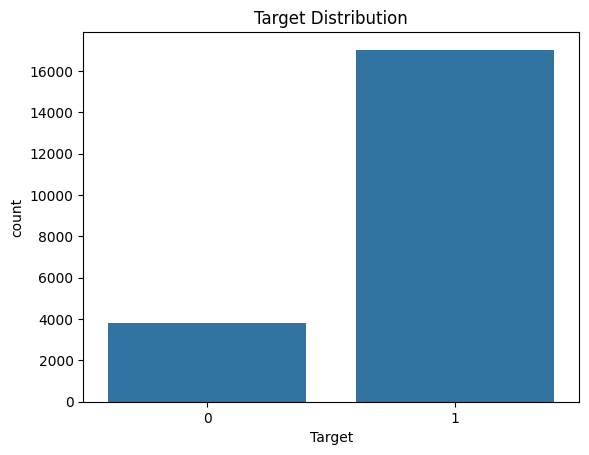

In [12]:
plt.figure()
sns.countplot(x='Target', data=df)
plt.title("Target Distribution")
plt.show()


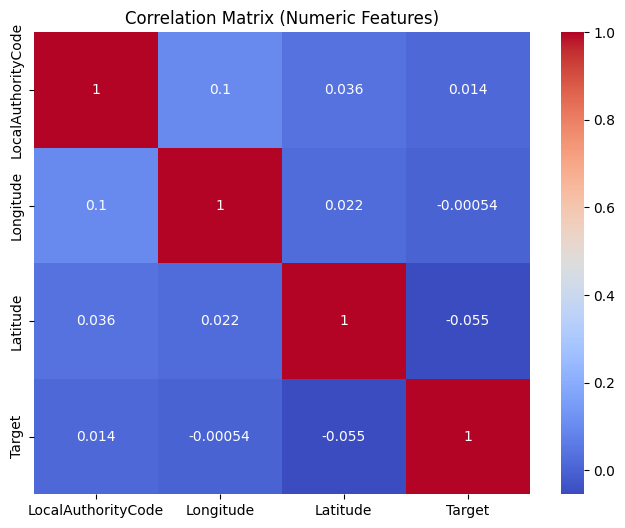

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


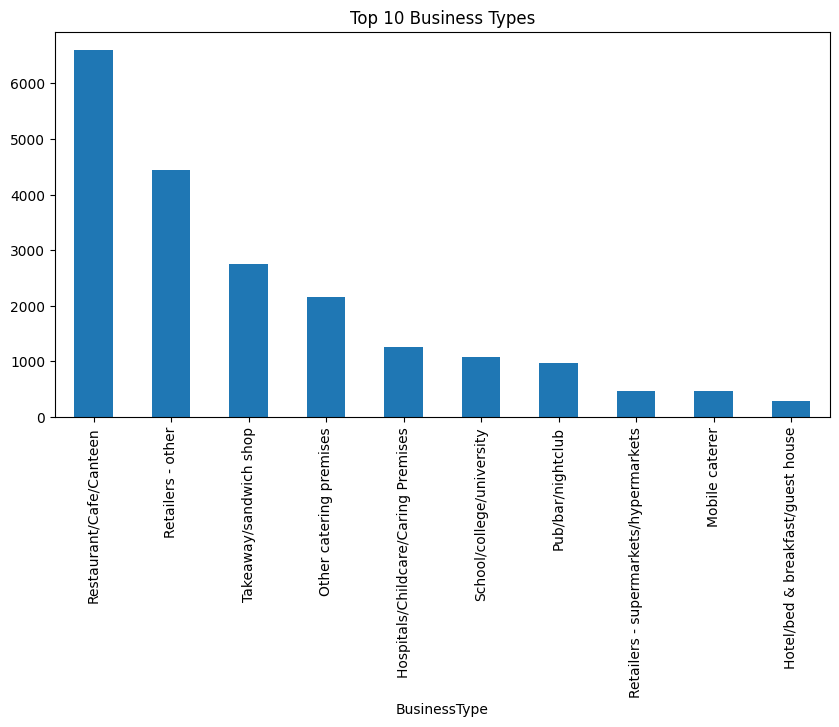

In [10]:
if 'BusinessType' in df.columns:
    plt.figure(figsize=(10,5))
    df['BusinessType'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Business Types")
    plt.show()
else:
    print("BusinessType column not found.")


In [15]:
df.columns = df.columns.str.strip()
print(df.columns)



Index(['BusinessType', 'PostCode', 'LocalAuthorityCode', 'LocalAuthorityName',
       'Longitude', 'Latitude', 'Target'],
      dtype='object')


In [16]:
# Create Target if it does not exist
if 'Target' not in df.columns:

    # Possible rating column names
    possible_rating_cols = ['RatingValue', 'Rating', 'rating', 'ratingvalue']

    rating_col = None
    for col in possible_rating_cols:
        if col in df.columns:
            rating_col = col
            break

    if rating_col is None:
        raise ValueError("No rating column found to create Target")

    # Convert to numeric
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

    # Drop rows with missing ratings
    df = df.dropna(subset=[rating_col])

    # Create binary Target
    df['Target'] = (df[rating_col] >= 4).astype(int)

    # Drop original rating column
    df = df.drop(rating_col, axis=1)

# Confirm Target
print("Target distribution:")
print(df['Target'].value_counts())


Target distribution:
Target
1    17027
0     3815
Name: count, dtype: int64


In [23]:
df = df.dropna()


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [25]:
X = df.drop('Target', axis=1)
y = df['Target']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (20842, 6)
y shape: (20842,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16673
Testing samples: 4169


In [27]:
# Imports for models and metrics, as they might not be in the current runtime.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the evaluate function as it's used later
def evaluate(y_test, y_pred, name):
    print("\n", name)
    print("Accuracy :", accuracy_score(y_test,y_pred))
    print("Precision:", precision_score(y_test,y_pred))
    print("Recall   :", recall_score(y_test,y_pred))
    print("F1 Score :", f1_score(y_test,y_pred))

# =====================================
# TASK 5: TWO CLASSICAL MODELS (needed for lr and rf definitions)
# =====================================

# Logistic Regression (for RFE estimator)
lr = LogisticRegression(max_iter=1000)

# Random Forest (for GridSearchCV estimator)
rf = RandomForestClassifier(random_state=42)


# =====================================
# TASK 6: HYPERPARAMETER TUNING (defines best_rf)
# =====================================
params = {
    'n_estimators':[50,100],
    'max_depth':[5,10],
    'min_samples_split':[2,5]
}

grid = GridSearchCV(
    rf,
    params,
    cv=5,
    scoring='f1'
)

# Assuming X_train and y_train from previous scaling/splitting are available
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_


# =====================================
# TASK 7: FEATURE SELECTION (RFE) (defines X_train_rfe, X_test_rfe)
# =====================================

rfe = RFE(
    estimator=lr,
    n_features_to_select=6
)

# Assuming X_train and y_train from previous scaling/splitting are available
rfe.fit(X_train, y_train)

# Note: Original notebook applied RFE transform on X (unscaled) after fitting on X_train (scaled).
# Following the original notebook's logic here for consistency.
# Assuming X (original features DataFrame) is available.
X_rfe = rfe.transform(X_scaled)

# Re-split data after RFE
# Assuming y (target Series) is available.
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(
    X_rfe, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --------- Random Forest (Optimized) ---------
best_rf.fit(X_train_rfe, y_train)
rf_final_pred = best_rf.predict(X_test_rfe)

# --------- Logistic Regression (Optimized) ---------
lr_final = LogisticRegression(max_iter=1000)
lr_final.fit(X_train_rfe, y_train)
lr_final_pred = lr_final.predict(X_test_rfe)

# --------- Neural Network (Optimized) ---------
mlp_final = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    max_iter=700,
    random_state=42
)
mlp_final.fit(X_train_rfe, y_train)
mlp_final_pred = mlp_final.predict(X_test_rfe)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("FINAL MODEL ACCURACY RESULTS\n")

print("Random Forest Accuracy:", accuracy_score(y_test, rf_final_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_final_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_final_pred))


FINAL MODEL ACCURACY RESULTS

Random Forest Accuracy: 0.8169824898057088
Logistic Regression Accuracy: 0.8169824898057088
Neural Network Accuracy: 0.8169824898057088


In [29]:
final_results = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, rf_final_pred),
        accuracy_score(y_test, lr_final_pred),
        accuracy_score(y_test, mlp_final_pred)
    ],
    "Precision": [
        precision_score(y_test, rf_final_pred),
        precision_score(y_test, lr_final_pred),
        precision_score(y_test, mlp_final_pred)
    ],
    "Recall": [
        recall_score(y_test, rf_final_pred),
        recall_score(y_test, lr_final_pred),
        recall_score(y_test, mlp_final_pred)
    ],
    "F1-Score": [
        f1_score(y_test, rf_final_pred),
        f1_score(y_test, lr_final_pred),
        f1_score(y_test, mlp_final_pred)
    ]
})

print(final_results)


                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest  0.816982   0.816982     1.0  0.899274
1  Logistic Regression  0.816982   0.816982     1.0  0.899274
2       Neural Network  0.816982   0.816982     1.0  0.899274
